In [6]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from tensorflow import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

print(f"Scikit-learn version: {sklearn.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version (TensorFlow's bundled Keras): {tf.__version__}")

Scikit-learn version: 1.6.1
TensorFlow version: 2.15.0
Keras version (TensorFlow's bundled Keras): 2.15.0


In [14]:
# Reload and preprocess data (same as Milestone 3, ensuring df_encoded is ready)
data_path = '../../data/placeholder_for_used_cars_dataset.csv'
try:
    df = pd.read_csv(data_path)
except FileNotFoundError:
    # Fallback to dummy data if not found, just like in milestone3
    data = {
        'make': ['Toyota', 'Honda', 'Ford', 'BMW', 'Toyota', 'Mercedes', 'Honda', 'Ford'],
        'model': ['Camry', 'Civic', 'Fusion', '3 Series', 'Corolla', 'C-Class', 'CRV', 'F-150'],
        'year': [2018, 2019, 2017, 2020, 2018, 2021, 2019, 2016],
        'mileage': [50000, 30000, 70000, 20000, 45000, 15000, 35000, 80000],
        'fuel_type': ['Petrol', 'Petrol', 'Petrol', 'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Petrol'],
        'transmission': ['Automatic', 'Manual', 'Automatic', 'Automatic', 'Manual', 'Automatic', 'Automatic', 'Automatic'],
        'selling_price': [18000, 16000, 12000, 35000, 15000, 45000, 20000, 25000]
    }
    df = pd.DataFrame(data)
    df.to_csv(data_path, index=False)
    df = pd.read_csv(data_path)

categorical_cols = ['make', 'model', 'fuel_type', 'transmission']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('selling_price', axis=1)
y = df_encoded['selling_price']

# Convert all features in X to float32 for TensorFlow compatibility
X = X.astype(np.float32)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (6, 15)
X_test shape: (2, 15)
y_train shape: (6,)
y_test shape: (2,)


In [16]:
# 2. 应用特征缩放
# 对数值型特征进行缩放，通常是 'year', 'mileage' 以及 One-Hot 编码后的某些列
# 识别数值型列 (排除 'selling_price' 和 One-Hot 编码后的非数值列)
numerical_features = ['year', 'mileage'] # 仅缩放这些原始数值特征

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("\nFeatures scaled successfully.")
print("X_train head after scaling (numerical features):")
print(X_train.head())



Features scaled successfully.
X_train head after scaling (numerical features):
       year   mileage  make_Ford  make_Honda  make_Mercedes  make_Toyota  \
0  0.000000  0.000000        0.0         0.0            0.0          1.0   
7 -1.549193  1.484615        1.0         0.0            0.0          0.0   
2 -0.774597  0.989743        1.0         0.0            0.0          0.0   
4  0.000000 -0.247436        0.0         0.0            0.0          1.0   
3  1.549193 -1.484615        0.0         0.0            0.0          0.0   

   model_C-Class  model_CRV  model_Camry  model_Civic  model_Corolla  \
0            0.0        0.0          1.0          0.0            0.0   
7            0.0        0.0          0.0          0.0            0.0   
2            0.0        0.0          0.0          0.0            0.0   
4            0.0        0.0          0.0          0.0            1.0   
3            0.0        0.0          0.0          0.0            0.0   

   model_F-150  model_Fusion  

In [17]:
# 3. 设计并构建深度神经网络 (DNN) 架构
input_dim = X_train.shape[1]

model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1) # 回归任务，输出层1个神经元，无激活函数（或线性激活）
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               2048      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12417 (48.50 KB)
Trainable params: 12417 (48.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Training DNN model...
Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 329497216.0000 - mae: 17499.9414 - mse: 329497216.0000 - val_loss: 812501696.0000 - val_mae: 27500.0273 - val_mse: 812501696.0000
Epoch 2/100
1/1 [==============================] - 0s 112ms/step - loss: 329494464.0000 - mae: 17499.8633 - mse: 329494464.0000 - val_loss: 812500288.0000 - val_mae: 27500.0000 - val_mse: 812500288.0000
Epoch 3/100
1/1 [==============================] - 0s 149ms/step - loss: 329492096.0000 - mae: 17499.7930 - mse: 329492096.0000 - val_loss: 812498944.0000 - val_mae: 27499.9727 - val_mse: 812498944.0000
Epoch 4/100
1/1 [==============================] - 0s 136ms/step - loss: 329489792.0000 - mae: 17499.7266 - mse: 329489792.0000 - val_loss: 812497792.0000 - val_mae: 27499.9512 - val_mse: 812497792.0000
Epoch 5/100
1/1 [==============================] - 0s 144ms/step - loss: 329487744.0000 - mae: 17499.6680 - mse: 329487744.0000 - val_loss: 812496768.0000 - val_mae: 27

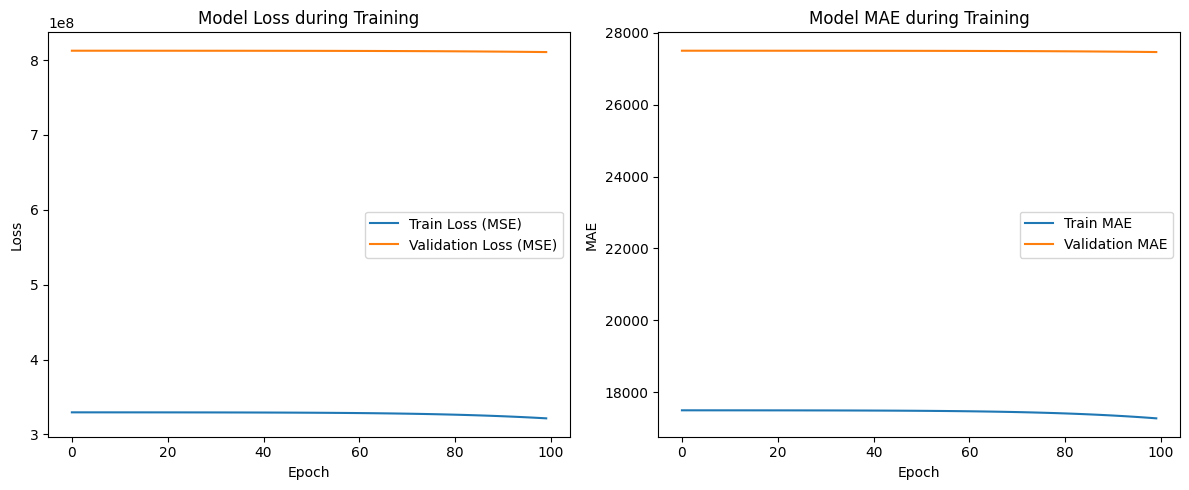

In [18]:
# 4. 编译和训练模型
# 编译模型：选择优化器、损失函数和评估指标
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse']) # MSE 作为损失函数，MAE 和 MSE 作为评估指标

# 训练模型
print("\nTraining DNN model...")
history = model.fit(X_train, y_train,
                    epochs=100, # 训练轮数
                    batch_size=32,
                    validation_split=0.2, # 从训练集中划分一部分作为验证集
                    verbose=1)

# 绘制训练历史
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE during Training')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()



Evaluating model performance on test set...
Test Loss (MSE): 1138165248.00
Test MAE: 30448.03
Test RMSE: 33736.70
1/1 [==============================] - 0s 186ms/step
Test R-squared (R²): -4.41


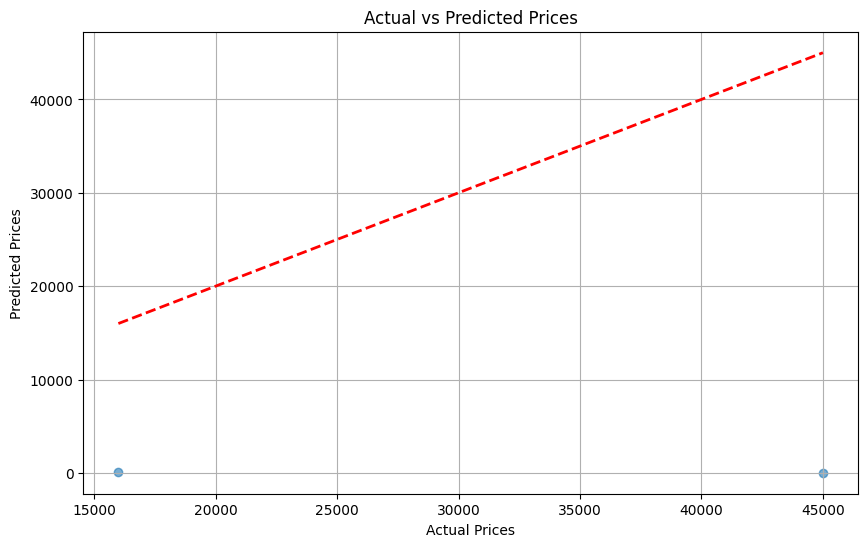


Saving car price prediction model to: ../../models/car_price_dnn.h5
Model saved.

Milestone 4 tasks completed.


/usr/local/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# 5. 评估模型性能
print("\nEvaluating model performance on test set...")
loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {loss:.2f}")
print(f"Test MAE: {mae:.2f}") # 平均绝对误差
print(f"Test RMSE: {np.sqrt(mse):.2f}") # 均方根误差

y_pred = model.predict(X_test).flatten() # 预测并展平为一维数组

# 计算 R-squared
r2 = r2_score(y_test, y_pred)
print(f"Test R-squared (R²): {r2:.2f}")

# 可视化预测结果与真实值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # 理想预测线
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

# 保存模型 (可选)
model_path = '../../models/car_price_dnn.h5'
print(f"\nSaving car price prediction model to: {model_path}")
model.save(model_path)
print("Model saved.")

print("\nMilestone 4 tasks completed.")
